# Keras iris Modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## 1.Data Preprocessing

  ### 1) iris.Species 빈도분석
    - Species : setosa, virginica, versicolor

  

In [5]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 2) DataFrame to Array & Casting

In [6]:
# object to float
iris_ar = iris.values
iris_ar

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [7]:
X = iris_ar[:,0:4].astype(float)
y = iris_ar[:,4]
X.shape, y.shape

((150, 4), (150,))

### 3) One-Hot Encoding with sklearn & Keras

- LabelEncoder() : ['satosa','virsinica','virsicolor']to[0,1,2]

- OneHotEncoding - to_categorical()

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
yLB = encoder.fit_transform(y) 

yOH = to_categorical(yLB)
yOH

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [9]:
# tensorflow version

import tensorflow
print(tensorflow.__version__)
print(tensorflow.keras.__version__)

2.5.0
2.5.0


### 4) train_test_split()

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,yOH,test_size = 0.3, random_state = 2045)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

## Keras Modeling

### 1) Keras models & layers import & model define

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

Model_iris = models.Sequential()
Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
# 마지막에는 relu를 사용할 수 없고, 다중분류는 softmax가 sigmoid 보다 효율적
Model_iris.add(layers.Dense(3, activation = 'softmax'))
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


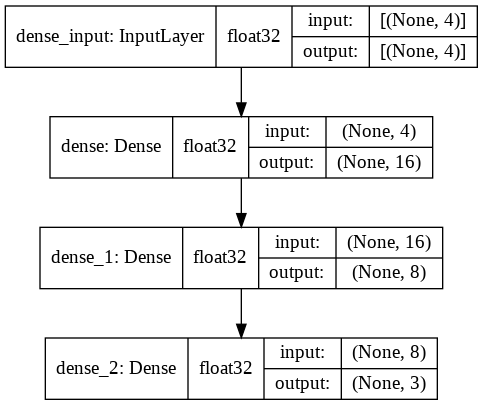

In [12]:
# 모델 레이어 시각화

from tensorflow.keras import utils

utils.plot_model(Model_iris, show_shapes = True, show_dtype = True)

### 2) Model Compile

- 모델 학습방법 설정

In [14]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

### 3) Model Fit

In [15]:
iris_fit = Model_iris.fit(X_train, y_train, epochs = 500, batch_size = 7,validation_data = (X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 28ms/step - loss: 2.7965 - accuracy: 0.3429 - val_loss: 2.3628 - val_accuracy: 0.3111
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1385 - accuracy: 0.3429 - val_loss: 1.8084 - val_accuracy: 0.3111
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.6517 - accuracy: 0.3429 - val_loss: 1.3814 - val_accuracy: 0.3111
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2889 - accuracy: 0.3429 - val_loss: 1.1286 - val_accuracy: 0.3111
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.3429 - val_loss: 1.0029 - val_accuracy: 0.3111
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9874 - accuracy: 0.3429 - val_loss: 0.9438 - val_accuracy: 0.3333
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9447 - accuracy: 0.5333 - val_loss: 0.9099 - val_accuracy: 0.7111
Epoch 8/500


### 4) 학습결과 시각화

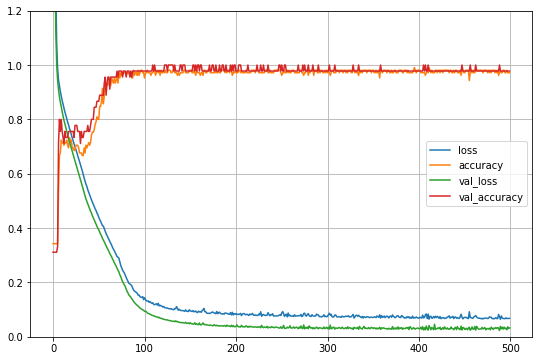

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.ylim(0, 1.2)
plt.plot(iris_fit.history['loss'])
plt.plot(iris_fit.history['accuracy'])
plt.plot(iris_fit.history['val_loss'])
plt.plot(iris_fit.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.grid()
plt.show()

### 5)Model Evaluation

- loss & Accuracy

In [20]:
loss, accuracy = Model_iris.evaluate(X_test,y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.9778
Loss = 0.03
Accuracy = 0.98


### 6) Model Predict

- probability

In [21]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)
Model_iris.predict(X_test)
# activation = 'softmax' 설정으로 값의 합이 1이 되어야함

array([[0.99976, 0.00024, 0.     ],
       [0.99812, 0.00188, 0.     ],
       [0.00649, 0.99351, 0.     ],
       [0.     , 0.00093, 0.99907],
       [0.99992, 0.00008, 0.     ],
       [0.00046, 0.99952, 0.00002],
       [0.     , 0.00451, 0.99549],
       [0.99995, 0.00005, 0.     ],
       [0.     , 0.00151, 0.99849],
       [0.99975, 0.00025, 0.     ],
       [0.     , 0.86715, 0.13285],
       [0.     , 0.00316, 0.99684],
       [0.00001, 0.9983 , 0.0017 ],
       [0.99998, 0.00002, 0.     ],
       [0.99993, 0.00007, 0.     ],
       [0.00002, 0.99759, 0.00239],
       [0.     , 0.99052, 0.00947],
       [0.99976, 0.00024, 0.     ],
       [0.00001, 0.9999 , 0.00009],
       [0.99995, 0.00005, 0.     ],
       [0.9998 , 0.0002 , 0.     ],
       [0.99977, 0.00023, 0.     ],
       [0.     , 0.00113, 0.99887],
       [0.99987, 0.00013, 0.     ],
       [0.     , 0.05474, 0.94526],
       [0.     , 0.00518, 0.99482],
       [0.9999 , 0.0001 , 0.     ],
       [0.     , 0.99935, 0.

In [26]:
y_hat = Model_iris.predict_classes(X_test)
print('y_hat : ',y_hat)
np.argmax(Model_iris.predict(X_test), axis = 1)

y_hat :  [0 0 1 2 0 1 2 0 2 0 1 2 1 0 0 1 1 0 1 0 0 0 2 0 2 2 0 1 1 2 0 1 0 1 1 1 2
 1 0 1 2 0 2 2 2]


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- OneHot Encoding to Array

  - np.argmax() : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환

In [28]:
y = np.argmax(y_test, axis=1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix & Claasification Report

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y,y_hat)

print(classification_report(y,y_hat,target_names=['satosa','virginica','versicolor']))

              precision    recall  f1-score   support

      satosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 3. Model Save & Load

In [31]:
!ls -l

total 36
-rw-r--r-- 1 root root 29384 Aug  4 08:47 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


In [32]:
Model_iris.save('Model_iris.h5')
!ls -l

total 72
-rw-r--r-- 1 root root 34600 Aug  4 09:07 Model_iris.h5
-rw-r--r-- 1 root root 29384 Aug  4 08:47 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


In [33]:
from google.colab import files
files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from keras.models import load_model
Model_local = load_model('Model_iris.h5')

In [37]:
Model_local.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [38]:
from google.colab import drive
drive.mount('/content/drive')
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'


Mounted at /content/drive
total 3850167
-rw------- 1 root root   31374019 Aug  4 07:16 Camel.zip
-rw------- 1 root root      20066 Aug  4 07:16 cat.1700.jpg
-rw------- 1 root root   69155672 Aug  4 07:16 creditCardFraud.zip
-rw------- 1 root root   82003032 Aug  4 07:16 DataSet.pkl
-rw------- 1 root root   90618980 Aug  4 07:16 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Aug  4 07:16 Face.zip
-rw------- 1 root root  862182613 Aug  4 07:17 GloVe.zip
-rw------- 1 root root  149574867 Aug  4 07:17 horse-or-human.zip
-rw------- 1 root root 1245927936 Aug  4 07:17 imagenetV2.zip
-rw------- 1 root root    8204887 Aug  4 07:17 Images_500.zip
-rw------- 1 root root   60711700 Aug  4 07:17 IMDB.zip
-rw------- 1 root root    4240457 Aug  4 07:17 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 Aug  4 07:17 ko_w2v.zip
-rw------- 1 root root   12929865 Aug  4 07:17 Logo_Data.zip
-rw------- 1 root root   18272469 Aug  4 07:17 MNIST.csv
-rw------- 1 root root    79035

In [39]:
import pandas as pd
DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')
DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


In [40]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [41]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34600 Aug  4 09:09 001_Model_iris.h5


In [42]:
from keras.models import load_model
Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')


In [43]:
Model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])